In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from scipy.stats import shapiro

In [4]:
diabetes = pd.read_csv('diabetes.csv')

In [5]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
for i in range(0,9):
      stat,p = shapiro(diabetes[diabetes.columns[i]])
      print(diabetes.columns[i], 'Test-Statistic=%.3f, p-value=%.3f' % (stat, p));
      alpha = 0.05
      if p > alpha:
          print(diabetes.columns[i], 'looks Gaussian (fail to reject H0)')
          print('---------------------------------------')
      else:
          print(diabetes.columns[i],'does not look Gaussian (reject H0)')
          print('---------------------------------------')

Pregnancies Test-Statistic=0.904, p-value=0.000
Pregnancies does not look Gaussian (reject H0)
---------------------------------------
Glucose Test-Statistic=0.970, p-value=0.000
Glucose does not look Gaussian (reject H0)
---------------------------------------
BloodPressure Test-Statistic=0.819, p-value=0.000
BloodPressure does not look Gaussian (reject H0)
---------------------------------------
SkinThickness Test-Statistic=0.905, p-value=0.000
SkinThickness does not look Gaussian (reject H0)
---------------------------------------
Insulin Test-Statistic=0.722, p-value=0.000
Insulin does not look Gaussian (reject H0)
---------------------------------------
BMI Test-Statistic=0.950, p-value=0.000
BMI does not look Gaussian (reject H0)
---------------------------------------
DiabetesPedigreeFunction Test-Statistic=0.837, p-value=0.000
DiabetesPedigreeFunction does not look Gaussian (reject H0)
---------------------------------------
Age Test-Statistic=0.875, p-value=0.000
Age does not 

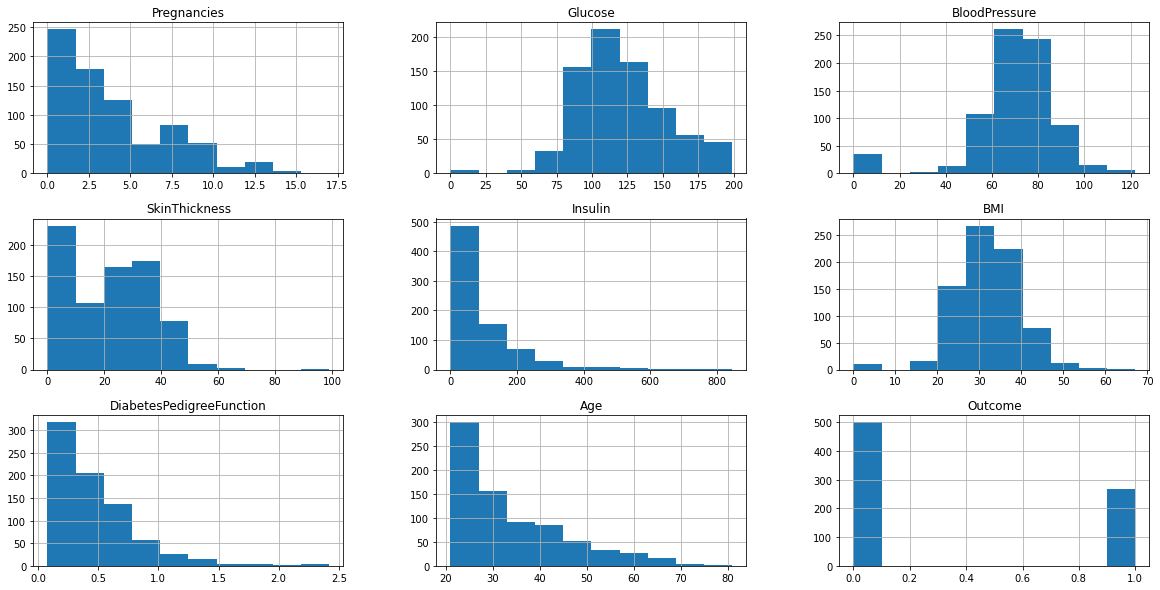

In [9]:
diabetes.hist(figsize=(20, 10));

In [11]:
xG = diabetes.iloc[:,0:-1] # X is the features in our dataset
yG = diabetes.iloc[:,-1]   # y is the Labels in our dataset
X_trainG, X_testG, y_trainG, y_testG = train_test_split(xG, yG, test_size=0.33, random_state=42)

In [12]:
modelG = GaussianNB().fit(X_trainG, y_trainG)
predG = modelG.predict(X_testG)

In [13]:
pd.crosstab(y_testG, predG, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,133,35,168
1,32,54,86
All,165,89,254


In [14]:
recall = recall_score(y_testG, predG, average='binary')
print('The Recall of the Gaussian model is', recall)

The Recall of the Gaussian model is 0.627906976744186


In [15]:
tn, fn, fp, tp = confusion_matrix(y_testG, predG).ravel()
accuracy = (tp + tn) /(tp+fp+tn+fn)
print('The accuracy of the Gaussian model is', accuracy)

The accuracy of the Gaussian model is 0.7362204724409449
